In [1]:
import pandas as pd
from gensim import utils
from gensim.models.doc2vec import TaggedDocument
from gensim.models import Doc2Vec
from gensim.parsing.preprocessing import preprocess_string, remove_stopwords
import random
import warnings
warnings.filterwarnings("ignore")


In [2]:
sample_news_data = '../../data_ch6/sample_news_data.txt'

In [3]:
with open(sample_news_data, encoding="utf8", errors='ignore') as f:
    news_lines = [line for line in f.readlines()]

In [4]:
lines_df = pd.DataFrame()

In [5]:
indices  = list(range(len(news_lines)))

In [6]:
lines_df['news'] = news_lines
lines_df['index'] = indices

In [7]:
lines_df.head()

,news,index
0,Top of the Pops leaves BBC One The BBC flagshi...,0
1,Oscars race enters final furlong The race for ...,1
2,US TV special for tsunami relief A US televisi...,2
3,Singer Ian Brown gig Former Stone Roses singer...,3
4,Housewives lift Channel ratings The debut of U...,4


In [8]:
def preprocess( document):
    """
    >>> preprocess("There is no list, successful applicants will be called for personal interview")
    ['list', 'success', 'applic', 'call', 'person', 'interview']
    """
    return preprocess_string(remove_stopwords(document))

In [9]:
document = lines_df['news'].apply(preprocess)

In [10]:
documents = [ TaggedDocument( text, [index]) 
                          for index, text in document.iteritems() ]

In [11]:
class DocumentDataset(object):
    
    def __init__(self, data:pd.DataFrame, column):
        document = data[column].apply(self.preprocess)
        
        self.documents = [ TaggedDocument( text, [index]) 
                          for index, text in document.iteritems() ]
      
    def preprocess(self, document):
        return preprocess_string(remove_stopwords(document))
        
    def __iter__(self):
        for document in self.documents:
            yield documents
            
    def tagged_documents(self, shuffle=False):
        if shuffle:
            random.shuffle(self.documents)
        return self.documents


In [12]:
documents_dataset = DocumentDataset(lines_df, 'news')

In [13]:
docVecModel = Doc2Vec(min_count=1, window=5, vector_size=100, sample=1e-4, negative=5, workers=8)
docVecModel.build_vocab(documents_dataset.tagged_documents())

In [14]:
docVecModel.train(documents_dataset.tagged_documents(shuffle=True),
            total_examples = docVecModel.corpus_count,
           epochs=10)


In [15]:
docVecModel.save('../../data_ch6/docVecModel.d2v')

In [16]:
docVecModel[657]

array([-0.17793494,  0.13225476,  0.05698598,  0.07724932,  0.05564932,
        0.03757233, -0.07476769,  0.05966651, -0.17573051,  0.362955  ,
       -0.17638607, -0.31255683, -0.3971337 ,  0.48035505,  0.03266984,
       -0.2199223 ,  0.03471873,  0.35469946, -0.30277103, -0.03001882,
       -0.48650455, -0.59031904, -0.38602367, -0.05301196,  0.18823239,
       -0.19223858, -0.22493303, -0.03900735, -0.02752154, -0.20115508,
        0.09855065, -0.3288641 ,  0.27234787,  0.3803171 ,  0.10439412,
       -0.1649609 , -0.24359559, -0.06253149, -0.00220728,  0.07410495,
        0.08562963,  0.0380777 ,  0.15549216,  0.13014151,  0.05476382,
        0.29835272, -0.05759297,  0.24620666,  0.05393421,  0.0620672 ,
       -0.23790695, -0.22876488,  0.02469573,  0.42620963,  0.04901211,
        0.15319276, -0.21683395, -0.31029764, -0.29725903,  0.1566753 ,
        0.08588437,  0.09600953,  0.04684894, -0.42221412,  0.29984358,
        0.32612672,  0.01700786,  0.06282821,  0.24016204, -0.18

In [17]:
def get_document_vector(document_index):
    """
    >>> get_document_vector(455).max()
    0.85495985
    
    """
    return docVecModel[document_index]

In [18]:
import matplotlib.pyplot as plt
 
def show_image(vector, line):
    fig, ax = plt.subplots(1,1, figsize=(10, 2))
    ax.tick_params(axis='both', 
                   which='both',
                   left=False, 
                   bottom=False,
                   top=False,
                   labelleft=False,
                   labelbottom=False)
    ax.grid(False)
    print(line)
    ax.bar(range(len(vector)), vector, 0.5)
   
  
def show_movie_line(line_number):
    line = lines_df[lines_df.index==line_number].news
    doc_vector = docVecModel[line_number]
    show_image(doc_vector, line)


872    Jobs go at Oracle after takeover Oracle has an...
Name: news, dtype: object


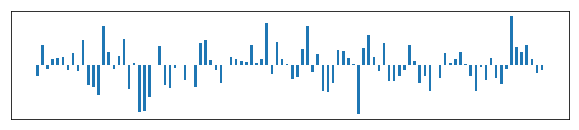

In [19]:
show_movie_line(872)

In [ ]:
import doctest
doctest.testmod(verbose=True)